In [4]:
import copy
import pickle
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [5]:
data = np.load("./complex_ejecta.npy", allow_pickle=True)
data.shape

(16033, 10)

In [6]:
# remove filename and category value
remove = [8,9]
y = data[:,8]
dataCE = np.delete(data, remove, 1) 
dataCE.shape, y.shape

((16033, 8), (16033,))

In [7]:
from keras import backend as K 

# Keras keeps models hanging around in memory. If we retrain a model, Keras will
# start from the previously concluded weight values. This resets everything.
K.clear_session()

In [8]:
def create_model(rows,columns,nClasses):
    
    inputs = tf.keras.layers.Input(shape=columns)
    
    hidden1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
    hidden2 = tf.keras.layers.Dense(8, activation='relu')(hidden1)
    
    distribution_params = layers.Dense(nClasses)(hidden2)
    outputs = tfp.layers.OneHotCategorical(1)(distribution_params)

    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model

In [9]:
bnn = create_model(dataCE.shape[0], dataCE.shape[1], 4)
bnn.load_weights("./model_weights_8PNN_no_sheath.h5")

2024-07-15 09:49:35.667424: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5337 MB memory:  -> device: 0, name: NVIDIA GeForce GTX TITAN Black, pci bus id: 0000:65:00.0, compute capability: 3.5


In [10]:
data = np.asarray(dataCE).astype('float32')

preds = []
p = bnn(data)
en = bnn(data).entropy()
    
for i in range(p.shape[0]):
    preds.append( np.argmax(p[i,:]) )

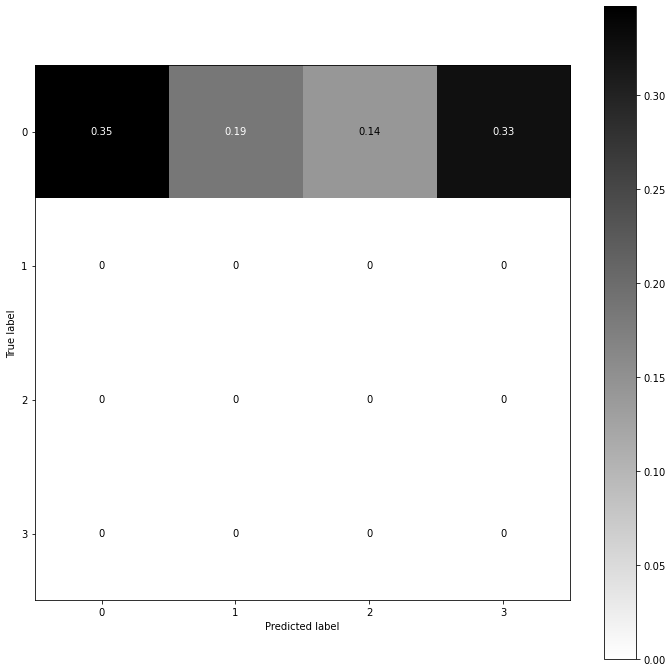

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12, 12))

cm = confusion_matrix( y.astype(int), preds, normalize='true' )
disp = ConfusionMatrixDisplay( confusion_matrix=cm )
disp.plot(ax=ax, cmap='gist_yarg')

In [15]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

y = y.astype(int)

print( "Macro F1:", np.round( f1_score(y, preds, average='macro'), 4 ))
print( "Macro Precision:", np.round( precision_score(y, preds, average='macro'), 4 ))
print( "Macro Recall:", np.round( recall_score(y, preds, average='macro'), 4 ))
print( "Accuracy:", np.round( accuracy_score(y, preds), 4 ))

Macro F1: 0.1289
Macro Precision: 0.25
Macro Recall: 0.0869
Accuracy: 0.3474


/opt/tljh/user/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
